In [1]:
from sympy import *
from dtumathtools import *

init_printing()

# Solution Suggestion for HW1

**_Assignment 1 in Mathematics 1b_**

**By David Thomas Hart**
*DTU Compute*

> If you have any questions/corrections/improvements - davidthart03@gmail.com

Note that the following answers are not representative of the "perfect" or "ideal" student solution. It is only meant to show correct solutions to the questions.

## Problem 1

We consider $q(x_1,x_2,x_3)=x_1^2+7x_2^2+7x_3^2+8x_1x_2-8x_1x_3+4x_2x_3+x_1-2x_2+3$.

### a)

We want to represent $q$ in matrix form:

$q(x_1,x_2,x_3)=\vec{x}^TA\vec{x}+\vec{b}^T\vec{x}+c$

where $\vec{x}=(x_1\:x_2\:x_3)^T$, $\vec{b}=(1\:-2\:\:0)^T$, $c=3$ and most importantly,

$ A=\begin{bmatrix}
1 & 4 & -4 \\
4 & 7 & 2 \\
-4 & 2 & 7 
\end{bmatrix}  $

We will find the eigenvalues and eigenvectors:

In [2]:
A = Matrix([[1, 4, -4], [4, 7, 2], [-4, 2, 7]])
ev = A.eigenvects()
ev

⎡⎛       ⎡⎡2 ⎤⎤⎞  ⎛      ⎡⎡1/2⎤  ⎡-1/2⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥  ⎢    ⎥⎥⎟⎥
⎢⎜-3, 1, ⎢⎢-1⎥⎥⎟, ⎜9, 2, ⎢⎢ 1 ⎥, ⎢ 0  ⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢   ⎥  ⎢    ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣ 0 ⎦  ⎣ 1  ⎦⎦⎠⎦

We know that $A$ is hermitian as it is real and symmetric. Therefore, we know that the eigenvector corresponding to $\lambda_1=-3$ is orthogonal to both eigenvectors associated to the eigenvalue 9. So, we only need to use Gram Schmidt on $\vec{v}_2$ and $\vec{v}_3$.

In [3]:
u1 = ev[0][2][0].normalized()
[u2, u3] = GramSchmidt([ev[1][2][0], ev[1][2][1]], orthonormal=True)
u1, u2, u3

⎛⎡ √6 ⎤          ⎡-√30 ⎤⎞
⎜⎢ ── ⎥  ⎡ √5 ⎤  ⎢─────⎥⎟
⎜⎢ 3  ⎥  ⎢ ── ⎥  ⎢ 15  ⎥⎟
⎜⎢    ⎥  ⎢ 5  ⎥  ⎢     ⎥⎟
⎜⎢-√6 ⎥  ⎢    ⎥  ⎢ √30 ⎥⎟
⎜⎢────⎥, ⎢2⋅√5⎥, ⎢ ─── ⎥⎟
⎜⎢ 6  ⎥  ⎢────⎥  ⎢ 30  ⎥⎟
⎜⎢    ⎥  ⎢ 5  ⎥  ⎢     ⎥⎟
⎜⎢ √6 ⎥  ⎢    ⎥  ⎢ √30 ⎥⎟
⎜⎢ ── ⎥  ⎣ 0  ⎦  ⎢ ─── ⎥⎟
⎝⎣ 6  ⎦          ⎣  6  ⎦⎠

Let's us check that $\beta=\{u_1,u_2,u_3\}$ is an orthonormal basis whose associated matrix has determinant $+1$:

In [4]:
U = Matrix.hstack(u1, u2, u3)
U, U.det(), U.T * U

⎛⎡ √6    √5   -√30 ⎤              ⎞
⎜⎢ ──    ──   ─────⎥              ⎟
⎜⎢ 3     5     15  ⎥              ⎟
⎜⎢                 ⎥     ⎡1  0  0⎤⎟
⎜⎢-√6   2⋅√5   √30 ⎥     ⎢       ⎥⎟
⎜⎢────  ────   ─── ⎥, 1, ⎢0  1  0⎥⎟
⎜⎢ 6     5     30  ⎥     ⎢       ⎥⎟
⎜⎢                 ⎥     ⎣0  0  1⎦⎟
⎜⎢ √6          √30 ⎥              ⎟
⎜⎢ ──    0     ─── ⎥              ⎟
⎝⎣ 6            6  ⎦              ⎠

We see that $\beta=\{u_1,u_2,u_3\}$  is an orthonormal basis with the "usual" orientation. We can quickly check that it diagonalizes $A$:

In [5]:
U.T * A * U == Matrix.diag([ev[0][0], ev[1][0], ev[1][0]])

True

### b)

We now want to find the reduced form of $q(x_1,x_2,x_3)$. We will make use of the basis change $\vec{x}=U\vec{y}$, substituting it into our matrix form of the expression:

In [6]:
y1, y2, y3 = symbols("y_1 y_2 y_3")
x = U * Matrix([y1, y2, y3])
b = Matrix([1, -2, 0])
expand((x.T * A * x + b.T * x)[0] + 3)

This matches our theory that suggests that we should have the eigenvalues as our coefficients of the square terms, and naturally we have no mixed terms either.

### c)

We want to justify that the range of $q$ is unbounded. Since $U$ performs an orthonormal transformation, we can just look at $q$ in this new basis. We can consider how the function acts when we keep two of the variables constant:

\begin{equation*}
q(y_1,0,0)=-3y_1^2+\frac{2\sqrt{6}}{3}y_1+3
\end{equation*}

This is the well-known formula for a parabola that opens *downward*. Similarly,  

\begin{equation*}
q(0,y_2,0)=9y_2^2+\frac{3\sqrt{5}}{5}y_2+3
\end{equation*}

which is a parabola that opens *upward*. Both parabolas go through $(0,3)$, and we conclude that the image set is $\mathrm{im}(f) = \mathbb{R}$. This clearly shows that $q$ attains arbitrarily large and small values.

## Problem 2

Consider a function $f:\mathbb{R}^2\rightarrow\mathbb{R}$ with the expression:

$f(x_1,x_2)=\sin(x_1^2+x_2)+x_1-x_2+3$

### a)

We want to display level curves and the gradient at the point $(x_1,x_2)=(-2,1)$. We can start by finding the gradient of $f$ at the point $P$.

In [7]:
x1, x2 = symbols("x_1 x_2")
f = sin(x1**2 + x2) + x1 - x2 + 3
grad = Matrix([diff(f, x1), diff(f, x2)])
# Can also be done using dtutools.gradient(f)
gradP = grad.subs({x1: -2, x2: 1})
gradP

⎡1 - 4⋅cos(5)⎤
⎢            ⎥
⎣-1 + cos(5) ⎦

And then generate the plot using:

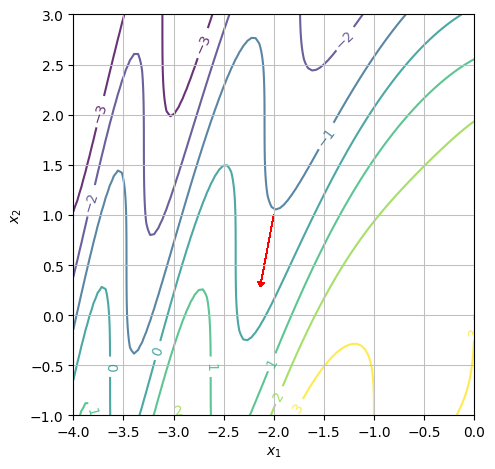

In [8]:
zvals = [-3, -2, -1, 0, 1, 2, 3]
p1 = dtuplot.plot_vector(
    gradP,
    (x1, -2, -2),
    (x2, 1, 1),
    quiver_kw={"scale": 4, "headwidth": 8, "color": "red"},
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    scalar=False,
    use_cm=False,
)
p2 = dtuplot.plot_contour(
    f,
    (x1, -4, 0),
    (x2, -1, 3),
    is_filled=False,
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    rendering_kw={"levels": zvals, "alpha": 0.8},
)
(p1 + p2).show()

### b)

We want to determine whether or not the function is increasing at the point $(x_1,x_2)=(-2,1)$ in the positive $x_1$ direction. We can see from the contour plot that $f(-2,1)\approx-1$ and that if we continue in the positive $x_1$ direction, the first level curve we hit is one at $f(x_1,x_2)=0$. However, we notice that the gradient vector (red arrow) points to the left. Hence,  the function is decreasing in the positive $x_1$ direction. 

We can check this in more detail by either computing the gradient or by zooming in:

In [9]:
gradP.evalf()

⎡-0.134648741852905⎤
⎢                  ⎥
⎣-0.716337814536774⎦

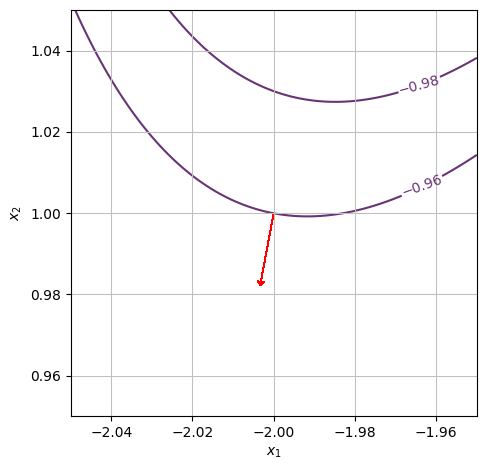

In [10]:
zvals = [-0.98, -0.9589, -0, 93]
p1 = dtuplot.plot_vector(
    gradP,
    (x1, -2, -2),
    (x2, 1, 1),
    quiver_kw={"scale": 4, "headwidth": 8, "color": "red"},
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    scalar=False,
    use_cm=False,
)
p2 = dtuplot.plot_contour(
    f,
    (x1, -2.05, -1.95),
    (x2, 0.95, 1.05),
    is_filled=False,
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    rendering_kw={"levels": zvals, "alpha": 0.8},
)
(p1 + p2).show()

### c)

We repeat a) and b) for the point $(x_1,x_2)=(2,-1)$.

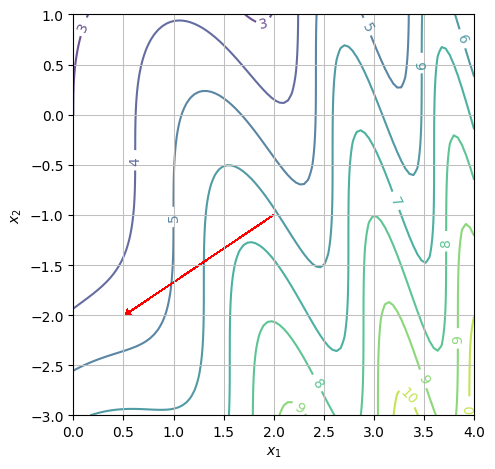

In [11]:
gradP2 = grad.subs({x1: 2, x2: -1})
p3 = dtuplot.plot_vector(
    gradP2,
    (x1, 2, 2),
    (x2, -1, -1),
    quiver_kw={"scale": 8, "headwidth": 8, "color": "red"},
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    scalar=False,
    use_cm=False,
)
p4 = dtuplot.plot_contour(
    f,
    (x1, 0, 4),
    (x2, -3, 1),
    is_filled=False,
    show=False,
    xlabel="$x_1$",
    ylabel="$x_2$",
    rendering_kw={"alpha": 0.8},
)
(p3 + p4).show()

Again, we need to look at the direction of the gradient vector. Since it points to the left, function is decreasing in the positive $x_1$ direction. The numerical value is:

In [12]:
gradP2.evalf()

⎡-2.95996998640178⎤
⎢                 ⎥
⎣-1.98999249660045⎦

## Problem 3

We consider two functions $\vec{f}:\mathbb{R}^4\rightarrow\mathbb{R}^3$ and $g:\mathbb{R}^3\rightarrow\mathbb{R}$. We are being informed that $\vec{f}$ has the expression

$\vec{f}(x_1,x_2,x_3,x_4)=(x_2x_3+x_1^2,-x_1x_4+x_2^3,x_1x_2x_3x_4)$.

We are furthermore informed that the Jacobian matrix $J_g\in\mathbb{R}^{1\times3}$ of $g$ is given by

$J_g(y_1,y_2,y_3)=\begin{bmatrix} 1+y_3+2y_1y_2 & y_1^2+2y_2y_3^2-3 & 3+y_1+2 y_3y_2^2 \\ \end{bmatrix}$.

### a)

We want to determine $J_{\vec{f}}(1,-2,-1,4)$.

In [13]:
x1, x2, x3, x4 = symbols("x1:5", real=True)
f = Matrix([[x2 * x3 + x1**2], [-x1 * x4 + x2**3], [x1 * x2 * x3 * x4]])
Jf = f.jacobian([x1, x2, x3, x4])
Jf.subs({x1: 1, x2: -2, x3: -1, x4: 4})

⎡2   -1  -2  0 ⎤
⎢              ⎥
⎢-4  12  0   -1⎥
⎢              ⎥
⎣8   -4  -8  2 ⎦

### b)

We now consider the composite map $g\circ\vec{f}$. We want to evaluate the Jacobian matrix of this map in the same point as question a). Using Theorem 3.8.4, we know that $J_{g\circ\vec{f}}(\vec{x})=J_g(\vec{y})J_{\vec{f}}(\vec{x})$. This is very neat as it means we already have all the information we need.

In [14]:
y1, y2, y3 = symbols("y1:4", real=True)
Jg = Matrix(
    [1 + y3 + 2 * y1 * y2, y1**2 + 2 * y2 * y3**2 - 3, 3 + 2 * y1 + 2 * y3 * y2**2]
).T
Jh = (Jg * Jf).subs({y1: f[0], y2: f[1], y3: f[2]})
Jh.subs({x1: 1, x2: -2, x3: -1, x4: 4})

[24498  -27549  -18378  6156]

# Problem 4

We are given a list of *one* nonzero vector $\pmb{v}$. The idea is a append more vectors to the $\pmb{v}$-list. One idea could be the append a basis to the list, but SymPy's GramSchmidt always will throw a `ValueError` in that case, e.g., if you call `GramSchmidt([v,e1,e2,e3,e4],orthonormal=True)`.

The better idea is append **three** more *linearly independent* vectors to $\pmb{v}$, and then do Gram Schmidt on the list of four vectors. Hence, the "only" difficult part of the exercise is the make sure that the vector to be appended is *linearly independent* to the vectors we already have.  

A simple approach is:

In [15]:
# The standard basis of C^4:
I4 = eye(4)
e1 = I4[:, 0]
e2 = I4[:, 1]
e3 = I4[:, 2]
e4 = I4[:, 3]


# Gram-Schmidt on v, e2, e3, e4
def onb_with_v_simple(v):
    return GramSchmidt([v, e2, e3, e4], orthonormal=True)

# A complex vector v and the corresponding orthonormal basis
v = Matrix([1, 2, 2 + I, 1])
beta = onb_with_v_simple(v)
beta

⎡               ⎡    -2⋅√77      ⎤  ⎡    ⎛  2   ⅈ⎞⎤        ⎤
⎢⎡    √11    ⎤  ⎢    ───────     ⎥  ⎢√14⋅⎜- ─ + ─⎟⎥        ⎥
⎢⎢    ───    ⎥  ⎢      77        ⎥  ⎢    ⎝  7   7⎠⎥        ⎥
⎢⎢    11     ⎥  ⎢                ⎥  ⎢─────────────⎥  ⎡-√2 ⎤⎥
⎢⎢           ⎥  ⎢      √77       ⎥  ⎢      2      ⎥  ⎢────⎥⎥
⎢⎢   2⋅√11   ⎥  ⎢      ───       ⎥  ⎢             ⎥  ⎢ 2  ⎥⎥
⎢⎢   ─────   ⎥  ⎢      11        ⎥  ⎢      0      ⎥  ⎢    ⎥⎥
⎢⎢    11     ⎥  ⎢                ⎥  ⎢             ⎥  ⎢ 0  ⎥⎥
⎢⎢           ⎥, ⎢    ⎛  4    2⋅ⅈ⎞⎥, ⎢     √14     ⎥, ⎢    ⎥⎥
⎢⎢√11⋅(2 + ⅈ)⎥  ⎢√77⋅⎜- ── - ───⎟⎥  ⎢     ───     ⎥  ⎢ 0  ⎥⎥
⎢⎢───────────⎥  ⎢    ⎝  11   11 ⎠⎥  ⎢      7      ⎥  ⎢    ⎥⎥
⎢⎢    11     ⎥  ⎢────────────────⎥  ⎢             ⎥  ⎢ √2 ⎥⎥
⎢⎢           ⎥  ⎢       7        ⎥  ⎢    ⎛  2   ⅈ⎞⎥  ⎢ ── ⎥⎥
⎢⎢    √11    ⎥  ⎢                ⎥  ⎢√14⋅⎜- ─ + ─⎟⎥  ⎣ 2  ⎦⎥
⎢⎢    ───    ⎥  ⎢    -2⋅√77      ⎥  ⎢    ⎝  7   7⎠⎥        ⎥
⎢⎣    11     ⎦  ⎢    ───────     ⎥  ⎢─────────────⎥        ⎥
⎣               ⎣      7

In [16]:
# The matrix U with the vectors of beta as columns
U = Matrix.hstack(*beta)

# The matrix U is unitary:
simplify(U.H * U)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

The simple approach does not work if $\pmb{v}$ is in the span of $\pmb{e_2},\pmb{e_3},\pmb{e_4}$ as we can see from:

In [17]:
u = Matrix([0, 1, 1, 0])
try:
    onb_with_v_simple(u)
except ValueError:
    print("u, e2, e3, e4 are not linearly independent")

u, e2, e3, e4 are not linearly independent


The simple approach is good enough in almost all cases since the subspace spanned by $\pmb{e_2},\pmb{e_3},\pmb{e_4}$ is very thin set in $\mathbb{C}^4$.

-----

*Skip the rest of the solution template for this exercise unless you are very interested in more details*

It is actually not so easy to get a method that always works (and it is expected that you delivered this) and, in particular, to get a numerical stable method. The following is just Gram-Schmidt on `v,e1,e2,e3,e4`, where we only except $\pmb{w}_k$ if the norm of the projection $\pmb{w}_k$ is larger than zero ($10^{-10}$ to account for small numerical errors):

In [18]:
def inner(x1: Matrix, x2: Matrix):
    """
    Computes the inner product of two vectors of same length.
    """

    return x1.dot(x2, conjugate_convention="right")


MutableDenseMatrix.inner = inner
ImmutableDenseMatrix.inner = inner

In [19]:
def onb_with_v(v):
    I4 = eye(4)
    e1 = I4[:, 0]
    e2 = I4[:, 1]
    e3 = I4[:, 2]
    e4 = I4[:, 3]

    # implement Gram-Schmidt
    u1 = v.normalized()

    for e in [e1, e2, e3, e4]:
        w = e - inner(e, u1) * u1
        if w.norm() > 1e-10:
            u2 = simplify(w.normalized())
            break

    for e in [e3, e4]:
        w = e - inner(e, u1) * u1 - inner(e, u2) * u2
        if w.norm() > 1e-10:
            u3 = simplify(w.normalized())
            break

    for e in [e2, e3, e4]:
        w = e - inner(e, u1) * u1 - inner(e, u2) * u2 - inner(e, u3) * u3
        if w.norm() > 1e-10:
            u4 = simplify(w.normalized())
            break

    U = Matrix.hstack(u1, u2, u3, u4)
    return U


U = onb_with_v(v)
U

⎡    √11          √110                           ⎤
⎢    ───          ────            0          0   ⎥
⎢    11            11                            ⎥
⎢                                                ⎥
⎢   2⋅√11        -√110       -√2⋅(2 - ⅈ)     √5  ⎥
⎢   ─────        ──────      ────────────    ──  ⎥
⎢    11            55             5          5   ⎥
⎢                                                ⎥
⎢√11⋅(2 + ⅈ)  √110⋅(-2 - ⅈ)       √2             ⎥
⎢───────────  ─────────────       ──         0   ⎥
⎢    11            110            2              ⎥
⎢                                                ⎥
⎢    √11         -√110       -√2⋅(2 - ⅈ)   -2⋅√5 ⎥
⎢    ───         ──────      ────────────  ──────⎥
⎣    11           110             10         5   ⎦

In [20]:
U.evalf(6)

⎡      0.301511                0.953463                    0                 0 ↪
⎢                                                                              ↪
⎢      0.603023                -0.190693         -0.565685 + 0.282843⋅ⅈ  0.447 ↪
⎢                                                                              ↪
⎢0.603023 + 0.301511⋅ⅈ  -0.190693 - 0.0953463⋅ⅈ         0.707107             0 ↪
⎢                                                                              ↪
⎣      0.301511               -0.0953463         -0.282843 + 0.141421⋅ⅈ  -0.89 ↪

↪     ⎤
↪     ⎥
↪ 214 ⎥
↪     ⎥
↪     ⎥
↪     ⎥
↪ 4427⎦

In [21]:
# The matrix U is unitary:
simplify(U.H * U)

⎡1  0  0  0⎤
⎢          ⎥
⎢0  1  0  0⎥
⎢          ⎥
⎢0  0  1  0⎥
⎢          ⎥
⎣0  0  0  1⎦

A numerical stable method should probably use NumPy or a similar library:

In [22]:
import numpy as np

v = np.array([1, 2, 2 + 1j, 1]).reshape(4, 1)
# Use the QR decomposition instead of the Gram-Schmidt process:
U_np, _ = np.linalg.qr(v, mode="complete")
U_np

array([[-0.30151134+0.j        , -0.60302269+0.j        ,
        -0.60302269+0.30151134j, -0.30151134+0.j        ],
       [-0.60302269-0.j        ,  0.72060454+0.j        ,
        -0.27939546+0.13969773j, -0.13969773+0.j        ],
       [-0.60302269-0.30151134j, -0.27939546-0.13969773j,
         0.65075567+0.j        , -0.13969773-0.06984887j],
       [-0.30151134-0.j        , -0.13969773+0.j        ,
        -0.13969773+0.06984887j,  0.93015113+0.j        ]])

# Problem 5

Consider a function $f:\mathbb{R}\rightarrow\mathbb{R}$ with the expression: $f(x)=(\text{ReLU}(x))^2$.

We start by plotting its graph:

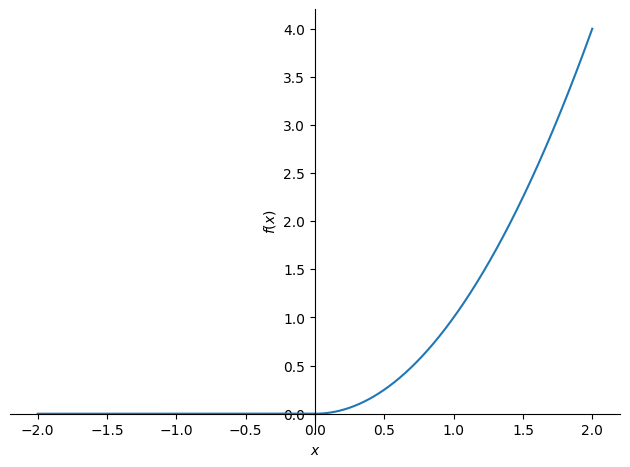

In [23]:
x = symbols('x', real=True)
f = Piecewise((0, x < 0), (x**2, x >= 0))
plot(f, (x, -2, 2), ylabel='$f(x)$', xlabel='$x$')

### a)

We want to justify that $f$ is differentiable on the entire axis and provide the expression for $f'$. The only point where it is not obvious that the function is differentiable is $x_0=0$.
To show that the function is differentiable in $x_0=0$, we must prove that there is a constant $c_1$ and an epsilon function $\varepsilon_1$ that satisfies:

\begin{equation*}
f(x_0+h)=f(x_0)+c_1\, h+\varepsilon_1 (h)\, h  
\end{equation*}

Using the definition of $f$, this is equivalent to:

\begin{equation*}
 f(h)=c_1\, h+\varepsilon_1 (h)\, h
\end{equation*}

We can now just "solve for $\varepsilon_1$". Since we always define $\varepsilon_1(0)=0$, we then get:

\begin{equation*} 
\varepsilon_1 (h)= 
\begin{cases} 
      \frac{f(h)-c_1 \,h}{h} & h \neq 0 \\
      0 & h=0 \\
\end{cases} 
\end{equation*}

**Note:** To verify differentiability of the function at $x_0$ it is not *finding* the expression for the epsilon-function that is difficult! We can always just rearrange the term to isolate the epsilon-function $\varepsilon_1$. The difficulty is: **Showing the _requirement_ on $\varepsilon_1$ which is that $\varepsilon_1(h) \to 0$ as $h \to 0$. A function with this property is sometimes called an "epsilon-function".**  

Here that is not too difficult:
If $h<0$, then $\varepsilon_1 (h) = (0 - c_1 h)/h = c_1$ which only goes to zero as $h \to 0$ if $c_1=0$. So we conclude that $c_1=0$. Therefore our $\varepsilon_1$ reduces to: 

\begin{equation*} 
\varepsilon_1 (h)= 
\begin{cases} 
      \frac{f(h)}{h} & h \neq 0 \\
      0 & h=0 \\
\end{cases} 
\end{equation*}

Recall that $f(h) = h^2$ if $h>0$ and $f(h) = 0$ if $h<0$. Hence, 

\begin{align*}
\varepsilon_1 (h) &= 
\begin{cases} 
      \frac{f(h)}{h} & h > 0 \\
      0 & h=0 \\
      \frac{f(h)}{h} & h < 0 
\end{cases} \\
&= \begin{cases} 
      h & h > 0 \\
      0 & h \le 0 
\end{cases} 
\end{align*}

which is clearly an epsilon function. Hence, $f$ is a differentiable function and:

\begin{equation*}
f'(x)=2\text{ReLU}(x).
\end{equation*}

### b)

Let us start by plotting $f'$ to get some intuition about where to look:

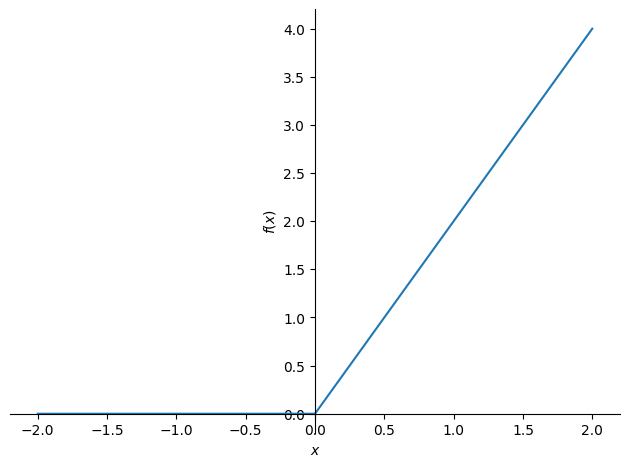

In [24]:
plot(f.diff(), (x, -2, 2), ylabel='$f(x)$', xlabel='$x$')

It looks like $f'$ is not differentiable at $x_0 = 0$, which is further supported by:

In [25]:
f.diff().diff()

⎧0  for x < 0
⎨            
⎩2  otherwise

To **prove** that the function is not differentiable at $x_0=0$, we must prove that there do not exist a constant $c_2$ and an epsilon function $\varepsilon_2$ that satisfy:

\begin{equation*}
f'(x_0+h)=f'(x_0)+c_2 \, h+\varepsilon_2 (h)\, h \Leftrightarrow f'(h)=c_2\, h+\varepsilon_2 (h)\, h
\end{equation*}

We can insolate $\varepsilon_2$ and proceed as in a), or we can argue as follows: The expression above can be divided into 2 parts:

\begin{equation*}
h \leq 0 : 0=(c_2 +\varepsilon_2 (h))h \ \ \ \text{and} \ \ \  h > 0 : 2h=(c_2 + \varepsilon_2 (h))h
\end{equation*} 

Since $\varepsilon_2$ is an epsilon function the first expression implies that the only value of $c_2$ possible is $c_2 =0$, which leads to:

\begin{equation*}
h \leq 0 : 0=(\varepsilon_2 (h))h \ \ \ \text{and} \ \ \  h > 0 : 2h=(\varepsilon_2 (h))h
\end{equation*} 

This can be rewritten as:

\begin{align*}
\varepsilon_2(h) = \begin{cases} 
      2 & h > 0 \\
      0 & h \le 0 
\end{cases} 
\end{align*}

which is clearly not an epsilon function.

### c)

We want to justify that $f'$ is continuous on the entire axis. Since $\text{ReLU}(x)$ is continuous in $x_0=0$, it follows that $2\text{ReLU}(x)=f'(x)$ is continuous in $x_0=0$.